In [36]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import calendar
import time 
from matplotlib import colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [37]:
df4 = pd.read_parquet('/home/aevans/ai2es/processed_data/frcst_err/gfs_fcast_and_error_df_12z_2018_mask_water_ny.parquet')
df4

t2m_GFS    d2m_GFS  \
station valid_time          time                                        
ADDI    2018-01-01 15:00:00 2018-01-01 12:00:00 -15.349532 -20.611755   
        2018-01-01 18:00:00 2018-01-01 12:00:00 -11.786198 -18.275512   
        2018-01-01 21:00:00 2018-01-01 12:00:00 -12.116852 -17.688393   
        2018-01-02 00:00:00 2018-01-01 12:00:00 -14.021501 -18.160225   
        2018-01-02 03:00:00 2018-01-01 12:00:00 -12.497983 -15.941133   
...                                                    ...        ...   
YORK    2018-12-31 15:00:00 2018-12-31 12:00:00   2.186060  -1.364597   
        2018-12-31 18:00:00 2018-12-30 12:00:00   4.949015  -0.360324   
                            2018-12-31 12:00:00   4.669552   1.121647   
        2018-12-31 21:00:00 2018-12-30 12:00:00   3.897998   1.429274   
                            2018-12-31 12:00:00   3.739721   2.365319   

                                                 u_total_GFS   u_dir_GFS  \
station valid_time          time                                           
ADDI    2018-01-01 15:00:00 2018-01-01 12:00:00     2.655496  288.477132   
        2018-01-01 18:00:00 2018-01-01 12:00:00     5.396916  285.354245   
        2018-01-01 21:00:00 2018-01-01 12:00:00     5.713116  286.574791   
        2018-01-02 00:00:00 2018-01-01 12:00:00     5.958310  273.989092   
        2018-01-02 03:00:00 2018-01-01 12:00:00     5.731337  300.191211   
...                                                      ...         ...   
YORK    2018-12-31 15:00:00 2018-12-31 12:00:00     2.903537  167.480260   
        2018-12-31 18:00:00 2018-12-30 12:00:00     3.245635  143.373289   
                            2018-12-31 12:00:00     3.649341  160.987738   
        2018-12-31 21:00:00 2018-12-30 12:00:00     3.753411  148.492735   
                            2018-12-31 12:00:00     3.969247  156.430448   

                                                  latitude  longitude  \
station valid_time          time                                        
ADDI    2018-01-01 15:00:00 2018-01-01 12:00:00  42.040359 -77.237259   
        2018-01-01 18:00:00 2018-01-01 12:00:00  42.040359 -77.237259   
        2018-01-01 21:00:00 2018-01-01 12:00:00  42.040359 -77.237259   
        2018-01-02 00:00:00 2018-01-01 12:00:00  42.040359 -77.237259   
        2018-01-02 03:00:00 2018-01-01 12:00:00  42.040359 -77.237259   
...                                                    ...        ...   
YORK    2018-12-31 15:00:00 2018-12-31 12:00:00  42.855042 -77.847763   
        2018-12-31 18:00:00 2018-12-30 12:00:00  42.855042 -77.847763   
                            2018-12-31 12:00:00  42.855042 -77.847763   
        2018-12-31 21:00:00 2018-12-30 12:00:00  42.855042 -77.847763   
                            2018-12-31 12:00:00  42.855042 -77.847763   

                                                 new_tp_GFS    prmsl_GFS  \
station valid_time          time                                           
ADDI    2018-01-01 15:00:00 2018-01-01 12:00:00    0.000000  1032.005312   
        2018-01-01 18:00:00 2018-01-01 12:00:00    0.005045  1029.631955   
        2018-01-01 21:00:00 2018-01-01 12:00:00    0.024612  1028.596029   
        2018-01-02 00:00:00 2018-01-01 12:00:00    0.010090  1029.466934   
        2018-01-02 03:00:00 2018-01-01 12:00:00    0.140135  1030.397604   
...                                                     ...          ...   
YORK    2018-12-31 15:00:00 2018-12-31 12:00:00    0.000000  1021.862726   
        2018-12-31 18:00:00 2018-12-30 12:00:00    0.000000  1018.794988   
                            2018-12-31 12:00:00    0.036240  1018.108928   
        2018-12-31 21:00:00 2018-12-30 12:00:00    0.195660  1015.613112   
                            2018-12-31 12:00:00    0.751858  1015.059228   

                                                       orog  t2m_error  ...  \
station valid_time          time                                        ...   
ADDI    2018-01

In [38]:
err = df4
err.keys()

Index(['t2m_GFS', 'd2m_GFS', 'u_total_GFS', 'u_dir_GFS', 'latitude',
       'longitude', 'new_tp_GFS', 'prmsl_GFS', 'orog', 't2m_error',
       'd2m_error', 'u_total_error', 'u_dir_error', 'new_tp_error',
       'prmsl_error', 't2m_nysm', 'd2m_nysm', 'u_total_nysm', 'u_dir_nysm',
       'new_tp_nysm', 'prmsl_nysm', 'lead_time_DAY', 'lead_time_HOUR',
       'lead_time_ONLY_HOURS'],
      dtype='object')

In [39]:
err_resamp = err[['t2m_error',
       'd2m_error', 'u_total_error', 'u_dir_error', 'new_tp_error',
       'prmsl_error', 'lead_time_DAY', 'lead_time_HOUR',
       'lead_time_ONLY_HOURS']]

In [40]:
err_resamp_t1 = err_resamp.where(err_resamp['lead_time_ONLY_HOURS'] == 1.0).dropna()

In [41]:
err_resamp_t1

,,,t2m_error,d2m_error,u_total_error,u_dir_error,new_tp_error,prmsl_error,lead_time_DAY,lead_time_HOUR,lead_time_ONLY_HOURS
station,valid_time,time,,,,,,,,,


In [42]:
addi = err_resamp_t1[:31].reset_index()

In [43]:
addi.keys()

Index(['station', 'valid_time', 'time', 't2m_error', 'd2m_error',
       'u_total_error', 'u_dir_error', 'new_tp_error', 'prmsl_error',
       'lead_time_DAY', 'lead_time_HOUR', 'lead_time_ONLY_HOURS'],
      dtype='object')

In [44]:
addi['t2m_error']

Series([], Name: t2m_error, dtype: float64)

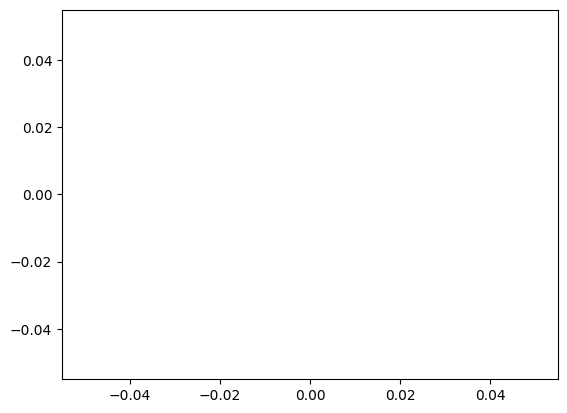

In [45]:
plt.plot(addi['t2m_error'])

In [46]:
def get_model_rmse_months_clim_divs(model, fcast_and_error_df, max_fhour, var, units, minmax):
    fcast_and_error_df = fcast_and_error_df.copy()
    fcast_and_error_df = fcast_and_error_df[fcast_and_error_df['lead_time_ONLY_HOURS']<=max_fhour]
    fcast_and_error_df[f'{var}_sq'] = fcast_and_error_df[var] ** 2
    rmse_months = fcast_and_error_df.groupby([fcast_and_error_df.time.dt.month, 
                                                            'station'])[f'{var}_sq'].mean().apply(np.sqrt)
    rmse_months_stns = fcast_and_error_df.groupby([fcast_and_error_df.time.dt.month, 
                                                            'station'])[f'{var}_sq'].mean().apply(np.sqrt)
    rmse_stns = fcast_and_error_df.groupby(['station'])[f'{var}_sq'].mean().apply(np.sqrt)

    new_column_order = ['Coastal', 'Champlain Valley', 'St. Lawrence Valley', 'Hudson Valley',
                       'Great Lakes', 'Mohawk Valley', 'Central Lakes', 'Eastern Plateau',
                        'Northern Plateau', 'Western Plateau']
    return rmse_months, rmse_stns, rmse_months_stns


def get_monthly_rmse_data(fhour_end, var):
    gfs_rmse_months, gfs_rmse_stns, gfs_rmse_months_stns = get_model_rmse_months_clim_divs('GFS', gfs_fcast_and_error_df, fhour_end, var, var_dict.get(var), var_val_range.get(var))
    nam_rmse_months, nam_rmse_stns, nam_rmse_months_stns = get_model_rmse_months_clim_divs('NAM', nam_fcast_and_error_df, fhour_end, var, var_dict.get(var), var_val_range.get(var))

    gfs_rmse_months = gfs_rmse_months.reset_index()
    nam_rmse_months = nam_rmse_months.reset_index()

    gfs_rmse_months['NWP Model'] = 'GFS'
    nam_rmse_months['NWP Model'] = 'NAM'
    
    print('GFS', gfs_rmse_months[f'{var}_sq'].mean())
    print('NAM', nam_rmse_months[f'{var}_sq'].mean())
    
    if fhour_end <= 18:
        hrrr_rmse_months, hrrr_rmse_stns, hrrr_rmse_months_stns = get_model_rmse_months_clim_divs('HRRR', hrrr_fcast_and_error_df, fhour_end, var, var_dict.get(var), var_val_range.get(var))
        hrrr_rmse_months = hrrr_rmse_months.reset_index()
        hrrr_rmse_months['NWP Model'] = 'HRRR'
        print('HRRR', hrrr_rmse_months[f'{var}_sq'].mean())
        rmse_to_plot = pd.concat([gfs_rmse_months, nam_rmse_months, hrrr_rmse_months])
    else:
        rmse_to_plot = pd.concat([gfs_rmse_months, nam_rmse_months])
    
    return rmse_to_plot


def plot_rmse_boxplots(fhour_end, var):
    rmse_to_plot = get_monthly_rmse_data(fhour_end, var)
    palette_DJF={'GFS':'dodgerblue','NAM':'dodgerblue','HRRR':'dodgerblue'}
    palette_MAM={'GFS':'darkorchid','NAM':'darkorchid','HRRR':'darkorchid'}
    palette_JJA={'GFS':'darkgreen','NAM':'darkgreen','HRRR':'darkgreen'}
    palette_SON={'GFS':'coral','NAM':'coral','HRRR':'coral'}
    h_ind = 3
    if fhour_end>18:
        palette_DJF.pop("HRRR", None)
        palette_MAM.pop("HRRR", None)
        palette_JJA.pop("HRRR", None)
        palette_SON.pop("HRRR", None)
        h_ind = h_ind - 1

    plt.figure(figsize=(12,5), dpi=100)
    ax = sns.boxplot(x='station', y=f'{var}_sq', data=rmse_to_plot, hue='NWP Model', width=0.7, zorder=4, palette="binary", medianprops=dict(color="white"))
    sns.stripplot(x='station', y=f'{var}_sq', data=rmse_to_plot[rmse_to_plot['time'].isin([12, 1, 2])], hue='NWP Model', size=5, dodge=True, zorder=5, palette=palette_DJF)
    sns.stripplot(x='station', y=f'{var}_sq', data=rmse_to_plot[rmse_to_plot['time'].isin([3, 4, 5])], hue='NWP Model', size=5, dodge=True, zorder=5, palette=palette_MAM)
    sns.stripplot(x='station', y=f'{var}_sq', data=rmse_to_plot[rmse_to_plot['time'].isin([6, 7, 8])], hue='NWP Model', size=5, dodge=True, zorder=5, palette=palette_JJA)
    sns.stripplot(x='station', y=f'{var}_sq', data=rmse_to_plot[rmse_to_plot['time'].isin([9, 10, 11])], hue='NWP Model', size=5, dodge=True, zorder=5, palette=palette_SON)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:h_ind]+handles[h_ind::h_ind], labels[0:h_ind]+['DJF','MAM','JJA','SON'], bbox_to_anchor=(0.91, 0.97), loc=2, borderaxespad=0.)
    plt.xticks(rotation=90)
    plt.grid(True, alpha=0.4, zorder=1)
    plt.ylabel(f'RMSE {units}')
    plt.xlabel('Station')
    plt.tight_layout()

In [47]:
def plot_model_rmse_heatmap_fhours_clim_divs(model, fcast_and_error_df, var, units, minmax):
    fcast_and_error_df = fcast_and_error_df.copy()
    fcast_and_error_df[f'{var}_sq'] = fcast_and_error_df[var] ** 2
    rmse = fcast_and_error_df.groupby(['lead_time_HOUR'])[f'{var}_sq'].mean().apply(np.sqrt)
    rmse_unstacked = rmse.unstack().T
    
    plt.figure(figsize=(20,5))
    ax = sns.heatmap(rmse_unstacked, annot=True, linewidths=.5, cmap=cm.YlGnBu, vmin=minmax[0], vmax=minmax[1],
                    cbar_kws={'label': f'RMSE [{units}]'})
    ax.set_xlabel('Forecast Hour')
    ax.set_title(f"{model}, {var.replace('_error','')}, Root Mean Square Error")
    plt.tight_layout()
    #plt.savefig(f"/home/lgaudet/AI2ES/Figures/{model}_monthly_clim_div_{var.replace('_error','')}_fhLEQ{max_fhour}_rmse.png", dpi=200, facecolor='white', transparent=False)
    return rmse

In [48]:
def read_data(init):
    years = ['2018', '2019', '2020', '2021']
    savedir = '/home/aevans/ai2es/processed_data/frcst_err/'

    nam_fcast_and_error = []
    gfs_fcast_and_error = []
    hrrr_fcast_and_error = []

    for year in years:
        nam_fcast_and_error.append(pd.read_parquet(f'{savedir}nam_fcast_and_error_df_{init}z_{year}_mask_water_ny.parquet'))
        gfs_fcast_and_error.append(pd.read_parquet(f'{savedir}gfs_fcast_and_error_df_{init}z_{year}_mask_water_ny.parquet'))
        hrrr_fcast_and_error.append(pd.read_parquet(f'{savedir}hrrr_fcast_and_error_df_{init}z_{year}_mask_water_ny.parquet'))

    nam_fcast_and_error_df = pd.concat(nam_fcast_and_error)
    gfs_fcast_and_error_df = pd.concat(gfs_fcast_and_error)
    hrrr_fcast_and_error_df = pd.concat(hrrr_fcast_and_error)
    
    # need to remove the random forecasts that have forecast hours 0
    # these are random because they only exist in the files that Ryan T. provided
    gfs_fcast_and_error_df = gfs_fcast_and_error_df[gfs_fcast_and_error_df['lead_time_ONLY_HOURS']!=0.]
    nam_fcast_and_error_df = nam_fcast_and_error_df[nam_fcast_and_error_df['lead_time_ONLY_HOURS']!=0.]
    hrrr_fcast_and_error_df = hrrr_fcast_and_error_df[hrrr_fcast_and_error_df['lead_time_ONLY_HOURS']!=0.]
    return gfs_fcast_and_error_df, nam_fcast_and_error_df, hrrr_fcast_and_error_df

In [49]:
init = '12'

gfs_fcast_and_error_df, nam_fcast_and_error_df, hrrr_fcast_and_error_df = read_data(init)

gfs_fcast_and_error_df = gfs_fcast_and_error_df.reset_index()
nam_fcast_and_error_df = nam_fcast_and_error_df.reset_index()
hrrr_fcast_and_error_df = hrrr_fcast_and_error_df.reset_index()

In [50]:
var_dict = {'d2m_error': '$^{\circ}$C',
            'u_dir_error': '$^{\circ}$',
            'u_total_error': 'm s$^{-1}$',
            't2m_error': '$^{\circ}$C',
            'new_tp_error': 'mm',
            'prmsl_error': 'hPa',
}

var_val_range = {'d2m_error': [1., 4.],
            'u_dir_error': [40, 100],
            'u_total_error': [1, 3.5],
            't2m_error': [1.5, 3.5],
            'new_tp_error': [0, 3.5],
            'prmsl_error': [-20, 100],
}

In [51]:
gfs_fcast_and_error_df.head()

,station,valid_time,time,t2m_GFS,d2m_GFS,u_total_GFS,u_dir_GFS,latitude,longitude,new_tp_GFS,...,prmsl_error,t2m_nysm,d2m_nysm,u_total_nysm,u_dir_nysm,new_tp_nysm,prmsl_nysm,lead_time_DAY,lead_time_HOUR,lead_time_ONLY_HOURS
0,ADDI,2018-01-01 15:00:00,2018-01-01 12:00:00,-15.349532,-20.611755,2.655496,288.477132,42.040359,-77.237259,0.000000,...,66.532533,-16.211229,-20.564865,1.854602,260.777710,0.000000,965.472778,0,3,3.0
1,ADDI,2018-01-01 18:00:00,2018-01-01 12:00:00,-11.786198,-18.275512,5.396916,285.354245,42.040359,-77.237259,0.005045,...,66.223569,-12.779670,-18.921921,4.014196,244.369293,0.000000,963.408386,0,6,6.0
2,ADDI,2018-01-01 21:00:00,2018-01-01 12:00:00,-12.116852,-17.688393,5.713116,286.574791,42.040359,-77.237259,0.024612,...,65.764059,-12.434510,-16.971771,2.923199,307.399109,0.000000,962.831970,0,9,9.0
3,ADDI,2018-01-02 00:00:00,2018-01-01 12:00:00,-14.021501,-18.160225,5.958310,273.989092,42.040359,-77.237259,0.010090,...,65.920914,-13.972590,-19.079498,2.254292,282.835999,0.149994,963.546021,0,12,12.0
4,ADDI,2018-01-02 03:00:00,2018-01-01 12:00:00,-12.497983,-15.941133,5.731337,300.191211,42.040359,-77.237259,0.140135,...,66.428000,-13.941200,-16.723541,2.284459,282.010406,0.000000,963.969604,0,15,15.0


In [52]:
rmse_to_plot = get_monthly_rmse_data(18, 't2m_error')

GFS 1.9642531135956673
NAM 1.8713559231397285
HRRR 2.1093862056732178


In [57]:
rmse_to_plot = rmse_to_plot.sort_values(by=['t2m_error_sq'])
rmse_to_plot

,time,station,t2m_error_sq,NWP Model
1218,10,QUEE,1.080360,NAM
104,1,STON,1.112473,NAM
1092,9,QUEE,1.136234,NAM
1143,10,BKLN,1.143872,NAM
1146,10,BROC,1.178534,HRRR
...,...,...,...,...
118,1,WBOU,3.820185,HRRR
240,2,WANT,4.072396,HRRR
493,4,WARS,4.118878,HRRR
114,1,WANT,4.205935,HRRR


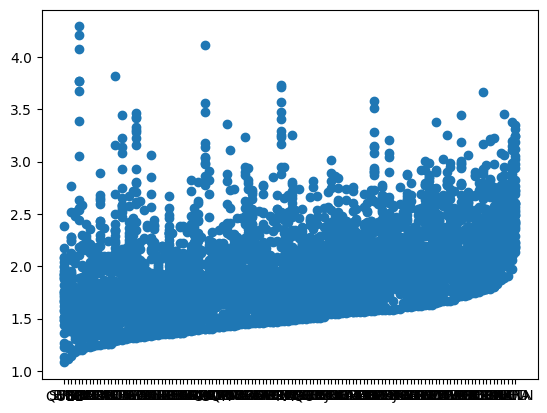

In [58]:
plt.scatter(rmse_to_plot['station'], rmse_to_plot['t2m_error_sq'])

In [35]:
rmse_to_plot['t2m_error_sq'].describe()

count    378.000000
mean       1.995507
std        0.438051
min        1.112473
25%        1.698161
50%        1.929722
75%        2.222187
max        4.205935
Name: t2m_error_sq, dtype: float64

In [59]:
diction = pd.read_csv('/home/aevans/landtype/notebooks/nysm_coords.csv')

In [60]:
ny_stations = diction['station']
ny_lats = diction['latitude']
ny_lons = diction['longitude']

In [61]:
latdict = dict(zip(diction.station, diction.latitude))
londict = dict(zip(diction.station, diction.longitude))

In [62]:
rmse_to_plot['lon'] = rmse_to_plot['station'].map(londict)
rmse_to_plot['lat'] = rmse_to_plot['station'].map(latdict)

In [63]:
top10 = rmse_to_plot[:45]
bottom10 = rmse_to_plot[-45:]

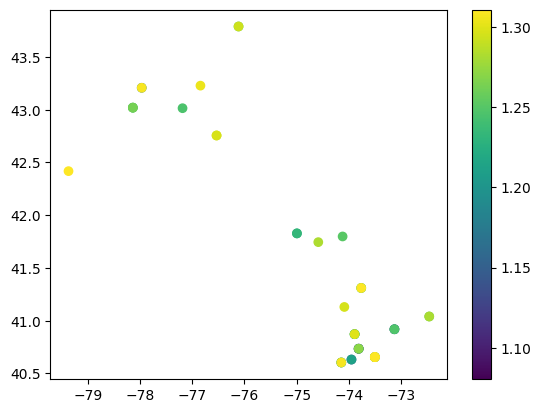

In [64]:
plt.scatter(top10['lon'], top10['lat'], c= top10['t2m_error_sq'])
plt.colorbar()

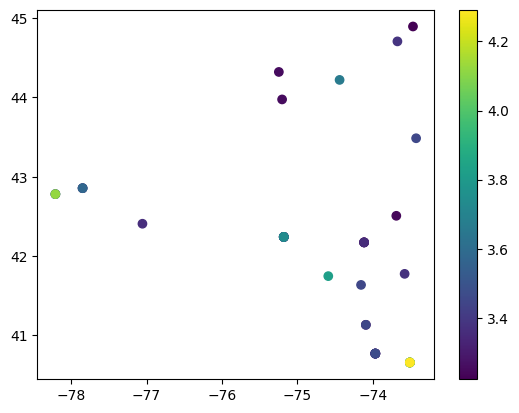

In [65]:
plt.scatter(bottom10['lon'], bottom10['lat'], c= bottom10['t2m_error_sq'])
plt.colorbar()

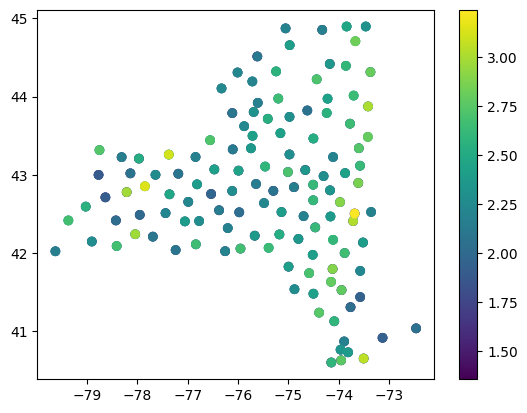

In [68]:
rmse_to_plot = rmse_to_plot[rmse_to_plot['time'] == 5]
top10 = rmse_to_plot[:30]
bottom10 = rmse_to_plot[:-30]
plt.scatter(top10['lon'], top10['lat'], c= top10['t2m_error_sq'])
plt.colorbar()

In [74]:
bottom10 = rmse_to_plot[-30:]
bottom10

,time,station,t2m_error_sq,NWP Model,lon,lat
512,5,BING,2.666677,GFS,-75.951042,42.058430
550,5,FRED,2.670746,GFS,-79.366600,42.418171
577,5,OLEA,2.675047,GFS,-78.407433,42.091412
622,5,WBOU,2.695075,HRRR,-74.588333,41.745049
595,5,SARA,2.696222,HRRR,-73.671150,44.707584
560,5,HERK,2.708557,GFS,-75.009567,43.036621
613,5,TUPP,2.711662,HRRR,-74.438263,44.221279
581,5,OSWE,2.721006,GFS,-76.553230,43.443184
522,5,BURT,2.734264,GFS,-78.749031,43.316990
552,5,GFAL,2.735727,GFS,-73.602020,43.340870


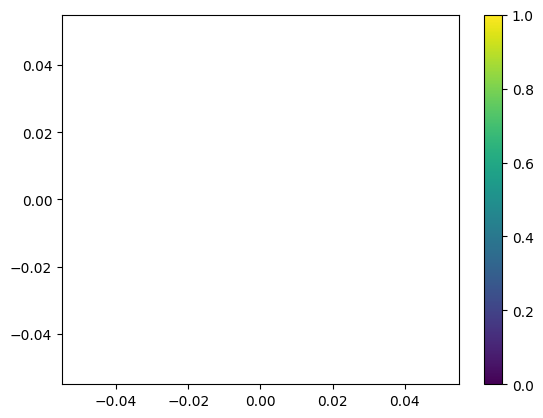

In [69]:
plt.scatter(bottom10['lon'], bottom10['lat'], c= bottom10['t2m_error_sq'])
plt.colorbar()

In [28]:
var = 't2m_error'
units = '$^{\circ}$C'
plot_model_rmse_heatmap_fhours_clim_divs('GFS', gfs_fcast_and_error_df, var, units, var_val_range.get(var))
plot_model_rmse_heatmap_fhours_clim_divs('NAM', nam_fcast_and_error_df, var, units, var_val_range.get(var))
plot_model_rmse_heatmap_fhours_clim_divs('HRRR', hrrr_fcast_and_error_df, var, units, var_val_range.get(var))

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.numeric.Int64Index'> was passed